In [7]:
import numpy as np
import pandas as pd
#from pandas_profiling import ProfileReport

# Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Perceptron
from sklearn import linear_model
from sklearn import preprocessing

# Forecasting
#from skforecast.ForecasterAutoreg import ForecasterAutoreg

# Visualizations
import seaborn as sns
from matplotlib import pyplot as plt

# Evaluation metrics
from sklearn import metrics

In [8]:
df = pd.read_csv('data_prueba_Forecasting.csv', parse_dates=['id_fec_diaria'])
print(df.shape)

(426377, 10)


In [316]:
#prof = ProfileReport(df)
#prof.to_file(output_file='output.html')
df.head()

,Unnamed: 0,Formato,Subformato,Tienda,Producto,id_fec_diaria,Venta,Precio,Venta_aa,Precio_aa
0,0,Super,Basico,1,369772,2021-08-01,7.0,17.168571,5.0,21.063200
1,1,Super,Basico,1,369772,2021-08-02,6.0,17.141667,3.0,21.388667
2,2,Super,Basico,1,369772,2021-08-03,5.0,17.136000,5.0,21.376199
3,3,Super,Basico,1,369772,2021-08-04,4.0,16.995000,3.0,21.360367
4,4,Super,Basico,1,369772,2021-08-05,1.0,17.240000,1.0,21.397100


Text(10, -30, 'End-of-season summer sales')

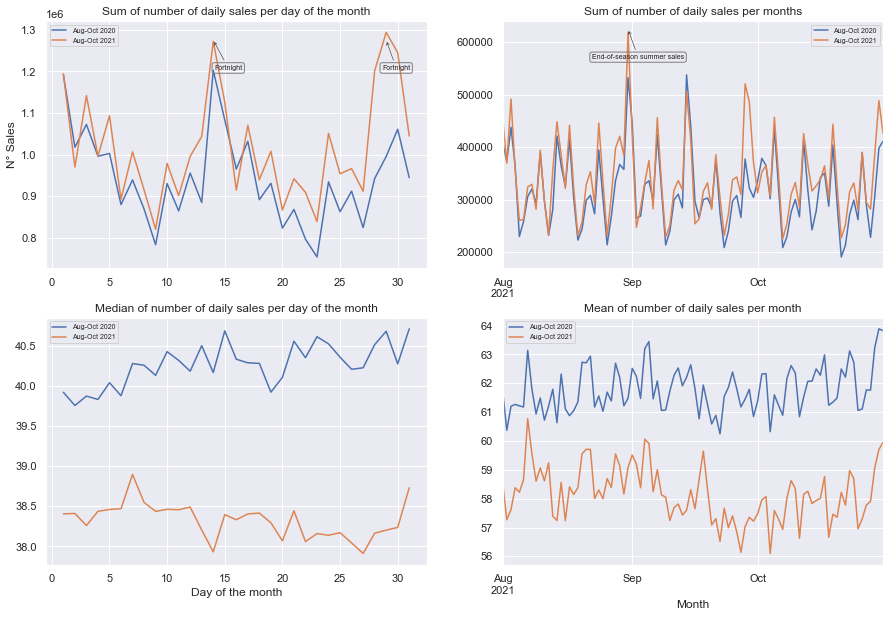

In [671]:
sns.set(rc={'figure.figsize':(15, 10)})
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
df.groupby(df['id_fec_diaria'].dt.day).sum()['Venta'].plot(ax=ax1, xlabel='') # TS for 2021
df.groupby(df['id_fec_diaria'].dt.day).sum()['Venta_aa'].plot(ax=ax1, xlabel='') # TS for 2020
ax1.legend(['Aug-Oct 2020', 'Aug-Oct 2021'], fontsize=7)
ax1.title.set_text('Sum of number of daily sales per day of the month')
ax1.set_ylabel('N° Sales')
ax1.annotate("Fortnight", xy=(14, 1275000),  xycoords='data', fontsize=7,
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(15, -30), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->", color='k', lw=.5))
ax1.annotate("Fortnight", xy=(29, 1275000),  xycoords='data', fontsize=7,
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -30), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->", color='k', lw=.5))

df.groupby(df['id_fec_diaria']).sum()['Venta'].plot(ax=ax2, xlabel='') # TS for 2021
df.groupby(df['id_fec_diaria']).sum()['Venta_aa'].plot(ax=ax2, xlabel='') # TS for 2020
ax2.title.set_text('Sum of number of daily sales per months')
ax2.legend(['Aug-Oct 2020', 'Aug-Oct 2021'], fontsize=7)
ax2.annotate("End-of-season summer sales", xy=('2021-08-31', 625000),  xycoords='data', fontsize=7,
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -30), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->", color='k', lw=.5))

df.groupby(df['id_fec_diaria'].dt.day).median()['Precio'].plot(ax=ax3, xlabel='') # TS for 2021
df.groupby(df['id_fec_diaria'].dt.day).median()['Precio_aa'].plot(ax=ax3, xlabel='') # TS for 2020
ax3.legend(['Aug-Oct 2020', 'Aug-Oct 2021'], fontsize=7)
ax3.title.set_text('Median of number of daily sales per day of the month')
ax3.set_xlabel('Day of the month')
ax3.annotate("Fortnight", xy=(14, 1275000),  xycoords='data', fontsize=7,
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(15, -30), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->", color='k', lw=.5))
ax3.annotate("Fortnight", xy=(29, 1275000),  xycoords='data', fontsize=7,
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -30), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->", color='k', lw=.5))

df.groupby(df['id_fec_diaria']).mean()['Precio'].plot(ax=ax4, xlabel='') # TS for 2021
df.groupby(df['id_fec_diaria']).mean()['Precio_aa'].plot(ax=ax4, xlabel='') # TS for 2020
ax4.title.set_text('Mean of number of daily sales per month')
ax4.set_xlabel('Month')
ax4.legend(['Aug-Oct 2020', 'Aug-Oct 2021'], fontsize=7)
ax4.annotate("End-of-season summer sales", xy=('2021-08-31', 625000),  xycoords='data', fontsize=7,
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -30), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->", color='k', lw=.5))

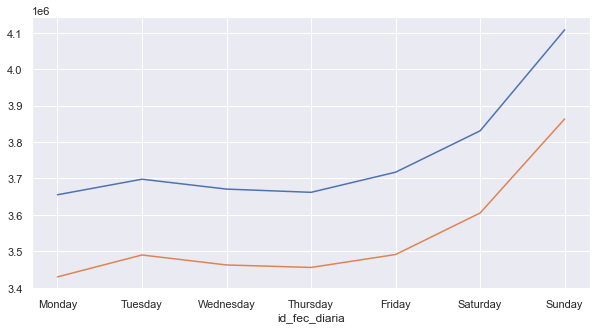

In [534]:
sns.set(rc={'figure.figsize':(10, 5)})
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df.groupby(df['id_fec_diaria'].dt.day_name()).sum().reindex(cats)['Precio'].plot()
df.groupby(df['id_fec_diaria'].dt.day_name()).sum().reindex(cats)['Precio_aa'].plot()
plt.show()

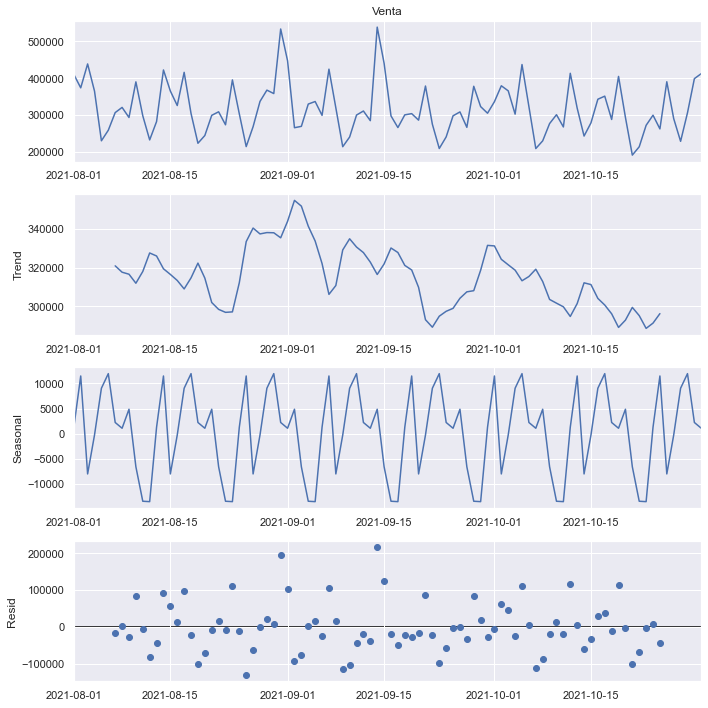

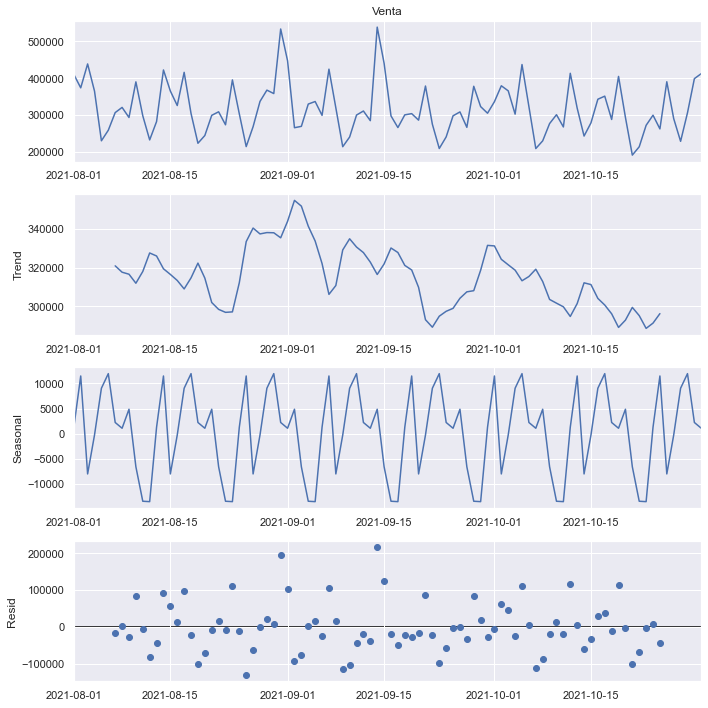

In [680]:
from statsmodels.tsa.seasonal import seasonal_decompose

sns.set(rc={'figure.figsize':(10, 10)})
df_ts = df.groupby(df['id_fec_diaria']).sum()
result = seasonal_decompose(df_ts['Venta'], model='linear', period=12)
result.plot()

#### In the next cell we can observe that the location and vairability of the diferent periods of time during 2020 and 2021 are very similar.

In [681]:
def get_order_statistics(s):
    print(f'Valor mínimo: {s.min()}')
    print(f'Percentil 10: {s.quantile(0.1)}')
    print(f'Percentil 25: {s.quantile(0.25)}')
    print(f'Percentil 50: {s.median()}')
    print(f'Percentil 75: {s.quantile(0.75)}')
    print(f'Percentil 90: {s.quantile(0.9)}')
    print(f'Valor máximo: {s.max()}')
    
print(get_order_statistics(df_vprod))
print(get_order_statistics(df_vprod_aa))

Valor mínimo: 2.0
Percentil 10: 197.88
Percentil 25: 412.5
Percentil 50: 1245.0800012350082
Percentil 75: 5253.0
Percentil 90: 24387.99999999999
Valor máximo: 1400055.2107868195
None
Valor mínimo: 1.0
Percentil 10: 198.0
Percentil 25: 430.0
Percentil 50: 1347.0
Percentil 75: 5836.0
Percentil 90: 26055.199999999983
Valor máximo: 1513788.0009422302
None


In [682]:
def drop_outlayer(df):
    iqr = df.quantile(0.75) - df.quantile(0.25)
    filtro_inferior = df > df.quantile(0.25) - (iqr * 1.5)
    filtro_superior = df < df.quantile(0.75) + (iqr * 1.5)
    df_f = df[(filtro_inferior) & (filtro_superior)]
    return df_f
df_f2020 = drop_outlayer(df_vprod)
df_f2021 = drop_outlayer(df_vprod_aa)
print(df_f2020.shape, df_f2021.shape)

(2035,) (2037,)


In [715]:
df_vprod.shape[0] - 370

2035

In [710]:
df_vprod_aa.head(120)

Producto
480        1.513788e+06
456        1.379613e+06
407        1.028736e+06
207185     9.374407e+05
116        8.174078e+05
               ...     
385940     5.292500e+04
1067975    5.268700e+04
503782     5.255400e+04
503914     5.250500e+04
303923     5.203336e+04
Name: Venta_aa, Length: 120, dtype: float64

What is the most sold period? 31511504.28 sales in 2020


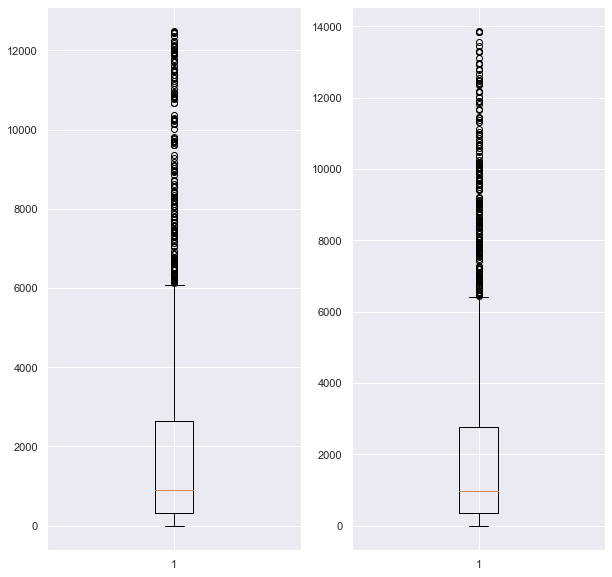

In [683]:
sns.set(rc={'figure.figsize':(10, 10)})
fig, (ax1, ax2) = plt.subplots(1, 2)
df_vprod = df.groupby(df['Producto'])['Venta'].sum().sort_values(ascending=False)
df_vprod_aa = df.groupby(df['Producto'])['Venta_aa'].sum().sort_values(ascending=False)
ax1.boxplot(df_f2020)
ax2.boxplot(df_f2021)
print("What is the most sold period? {} sales in 2020".format(round(df_vprod_aa.sum(), 2)))

In [691]:
df_ts = df.groupby(df['id_fec_diaria']).sum()
total20 = []
total21 = []
for i in df_ts.reset_index()['id_fec_diaria']:
    t20, t21 = 0, 0
    for j, row in df[df['id_fec_diaria'] == i].iterrows():
        t20 += (row.Venta * row.Precio)
        t21 += (row.Venta_aa * row.Precio)
    total20.append(t20)
    total21.append(t21)
len(total20), len(total21)

(92, 92)

# Preprocessing

In [688]:
# Creating new index for 2020
df_ts = df.groupby(df['id_fec_diaria']).sum()
df_ts.reset_index(inplace=True)

index_2020 = []
index_2021 = []
c = -92
for i, row in df_ts.iterrows():
    index_2020.append(c)
    index_2021.append(int(df[df['id_fec_diaria'] == row['id_fec_diaria']]['Unnamed: 0'].unique()))
    c += 1
df_ts['day_2020'] = index_2020
df_ts['day_2021'] = index_2021

df_2020 = df_ts[['Venta_aa', 'Precio_aa', 'id_fec_diaria', 'day_2020']]
df_2020.rename(columns={'Venta_aa': 'Venta', 'Precio_aa': 'Precio', 'day_2020': 'day'}, inplace=True)
df_2020['total'] = total20
df_2021 = df_ts[['Venta', 'Precio', 'id_fec_diaria', 'day_2021']]
df_2021.rename(columns={'Venta_aa': 'Venta', 'Precio_aa': 'Precio', 'day_2021': 'day'}, inplace=True)
df_2021['total'] = total21
df_ts = pd.concat([df_2021, df_2020]).set_index('day')
df_ts.sort_index(ascending=True, inplace=True)

C:\Users\fagui\AppData\Local\Temp\ipykernel_12916\3858025710.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020.rename(columns={'Venta_aa': 'Venta', 'Precio_aa': 'Precio', 'day_2020': 'day'}, inplace=True)
C:\Users\fagui\AppData\Local\Temp\ipykernel_12916\3858025710.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['total'] = total20
C:\Users\fagui\AppData\Local\Temp\ipykernel_12916\3858025710.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

### Periods from August 1st to October 14th from both years for training and the last days for train.

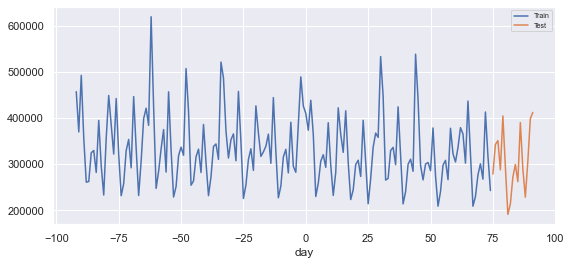

In [477]:
days = 17
df_train = df_ts.iloc[:-days]
df_test = df_ts.iloc[-days:]

fig, ax = plt.subplots(figsize=(9, 4))
df_train['Venta'].plot(ax=ax, label='train')
df_test['Venta'].plot(ax=ax, label='test')
ax.legend(['Train', 'Test'], fontsize=7)

In [725]:
x_train = df_train[['Precio', 'total']].to_numpy()#.reshape(-1, 1)
y_train = df_train['Venta'].to_numpy().reshape(-1, 1)

x_test = df_test[['Precio', 'total']].to_numpy()#.reshape(-1, 1)
y_test = df_test['Venta'].to_numpy().reshape(-1, 1)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(167, 2) (167, 1) (17, 2) (17, 1)


In [724]:
# Uncomment if your want recover the first test

#x_train = df_train[['Precio']].to_numpy().reshape(-1, 1)
#y_train = df_train['Venta'].to_numpy().reshape(-1, 1)

#x_test = df_test[['Precio']].to_numpy().reshape(-1, 1)
#y_test = df_test['Venta'].to_numpy().reshape(-1, 1)
#print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

## Linear Regression

27385.152803788405
880283580.4652032
29669.573311141554
[[303215.21476426]
 [317301.92085274]
 [333236.36002137]
 [322762.84695115]
 [408746.29433086]] [[278544.57087004]
 [342571.54642512]
 [350909.70904791]
 [287763.24050642]
 [404328.7102219 ]]


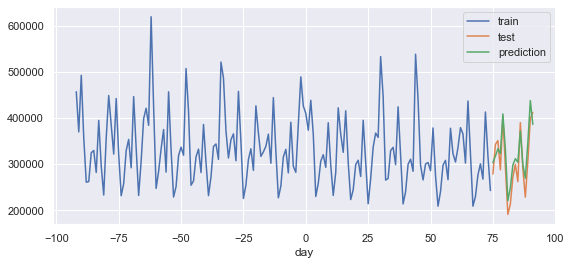

In [791]:
reg = LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_test)

# calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(y_pred[:5], y_test[:5])
df_test['y_pred'] = y_pred
fig, ax = plt.subplots(figsize=(9, 4))
df_train['Venta'].plot(ax=ax, label='train')
df_test['Venta'].plot(ax=ax, label='test')
df_test['y_pred'].plot(ax=ax, label='prediction')
ax.legend()

## Polinomial Regression

28989.88520700635
1073385272.7748194
32762.559008337845


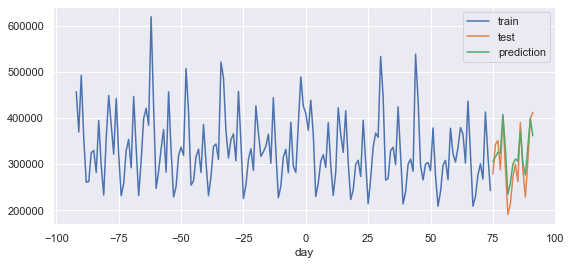

In [792]:
n = 2
model = Pipeline([('poly', PolynomialFeatures(degree=n, include_bias=False)),
                  ('linear', LinearRegression(fit_intercept=False))])
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


# calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
y_pred[:5], y_test[:5]
df_test['y_pred'] = y_pred
fig, ax = plt.subplots(figsize=(9, 4))
df_train['Venta'].plot(ax=ax, label='train')
df_test['Venta'].plot(ax=ax, label='test')
df_test['y_pred'].plot(ax=ax, label='prediction')
ax.legend()

## Ridge regression

27385.152803788533
880283580.4652119
29669.5733111417
[[303215.21476426]
 [317301.92085274]
 [333236.36002137]
 [322762.84695115]
 [408746.29433086]] [[278544.57087004]
 [342571.54642512]
 [350909.70904791]
 [287763.24050642]
 [404328.7102219 ]]


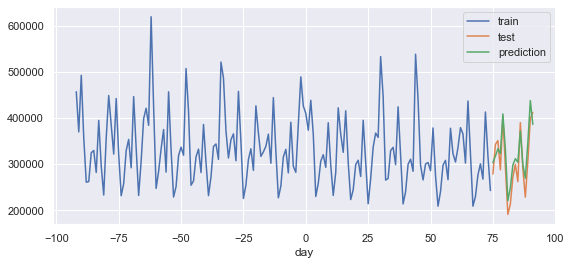

In [793]:
reg = linear_model.Ridge(alpha=0.0001, copy_X= True, fit_intercept=True, max_iter=100000, normalize='deprecated',positive=False, random_state=n,solver= 'auto', tol= 0.001)
#alpha=0.0001, max_iter=100000, solver='auto')
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

# calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(y_pred[:5], y_test[:5])
df_test['y_pred'] = y_pred
fig, ax = plt.subplots(figsize=(9, 4))
df_train['Venta'].plot(ax=ax, label='train')
df_test['Venta'].plot(ax=ax, label='test')
df_test['y_pred'].plot(ax=ax, label='prediction')
ax.legend()

In [794]:
forecaster = ForecasterAutoreg(
                regressor = reg,
                lags = 5
             )

forecaster.fit(y=df_test['Venta']) # Nedd a data Series
df_forc = forecaster.predict(steps=15)

C:\Users\fagui\anaconda3\envs\envDL\lib\site-packages\skforecast\utils\utils.py:256: UserWarning: `y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\fagui\anaconda3\envs\envDL\lib\site-packages\skforecast\utils\utils.py:256: UserWarning: `y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(


In [795]:
import datetime

id_fec_diaria = []
for i in range(df_forc.shape[0]):
    id_fec_diaria.append(df['id_fec_diaria'].max() + datetime.timedelta(days=i+1))
df_forc.index = id_fec_diaria
df_forc.to_csv('Forecast_Nov15.csv', index=True)

## Random Forest Regression

C:\Users\fagui\AppData\Local\Temp\ipykernel_12916\367848043.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(x_train, y_train)


29472.20417833799
1192449118.7525373
34531.856578419545


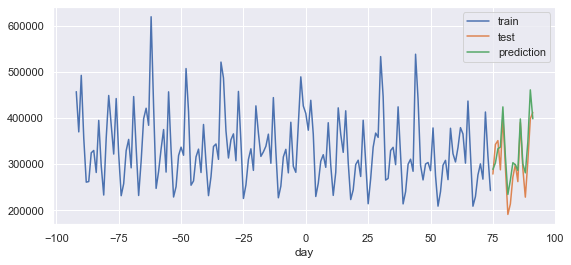

In [796]:
reg = RandomForestRegressor(max_depth=15, random_state=n, n_estimators=70, n_jobs=-1, max_features='auto', criterion='squared_error', ccp_alpha=0.0001)
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

# calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
y_pred[:5], y_test[:5]
df_test['y_pred'] = y_pred
fig, ax = plt.subplots(figsize=(9, 4))
df_train['Venta'].plot(ax=ax, label='train')
df_test['Venta'].plot(ax=ax, label='test')
df_test['y_pred'].plot(ax=ax, label='prediction')
ax.legend()

## Bayesian Ridge


27790.041730885812
909723027.8825254
30161.615140481543


C:\Users\fagui\anaconda3\envs\envDL\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


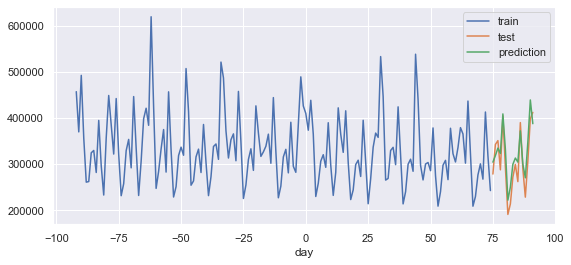

In [797]:
reg = linear_model.BayesianRidge()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

# calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
df_test['y_pred'] = y_pred
fig, ax = plt.subplots(figsize=(9, 4))
df_train['Venta'].plot(ax=ax, label='train')
df_test['Venta'].plot(ax=ax, label='test')
df_test['y_pred'].plot(ax=ax, label='prediction')
ax.legend()